In [1]:
import sys
import pandas as pd
import matplotlib as plt
from datetime import date, datetime, timedelta
import matplotlib.dates as mdates
from PIL import Image as im
from matplotlib import colors

parentparentdir = os.path.dirname(os.path.dirname(os.getcwd()))

from config import *
from SE_Interface import *
from Display_Interface import *

In [2]:
se_interface = SE_Interface()

summer = datetime(year=2021, month=8, day=10, hour=23)
now = datetime.now()


data = se_interface.request_SitePowerDetailed(now, timedelta(days=1))
summer_data = se_interface.request_SitePowerDetailed(summer, timedelta(days=1))

INFO:root:Requesting: https://monitoringapi.solaredge.com/site/2130766/powerDetails?meters=Consumption,Production,SelfConsumption,FeedIn,Purchased&startTime=2021-12-20 01:15:45&endTime=2021-12-21 01:15:45&api_key=NTT5LNJGA5CDCFI9OZGZCX2W1VD3CCW2
INFO:root:Requesting: https://monitoringapi.solaredge.com/site/2130766/powerDetails?meters=Consumption,Production,SelfConsumption,FeedIn,Purchased&startTime=2021-08-09 23:00:00&endTime=2021-08-10 23:00:00&api_key=NTT5LNJGA5CDCFI9OZGZCX2W1VD3CCW2


In [3]:
data

,FeedIn,Consumption,Production,Purchased,SelfConsumption
date,,,,,
2021-12-20 01:15:00,0.0,2376.1670,0.0,2376.1670,0.0
2021-12-20 01:30:00,0.0,2555.9387,0.0,2555.9387,0.0
2021-12-20 01:45:00,0.0,2667.5288,0.0,2667.5288,0.0
2021-12-20 02:00:00,0.0,3294.6309,0.0,3294.6309,0.0
2021-12-20 02:15:00,0.0,2647.2444,0.0,2647.2444,0.0
...,...,...,...,...,...
2021-12-21 00:15:00,0.0,2232.4946,0.0,2232.4946,0.0
2021-12-21 00:30:00,0.0,2593.7854,0.0,2593.7854,0.0
2021-12-21 00:45:00,0.0,2556.9988,0.0,2556.9988,0.0


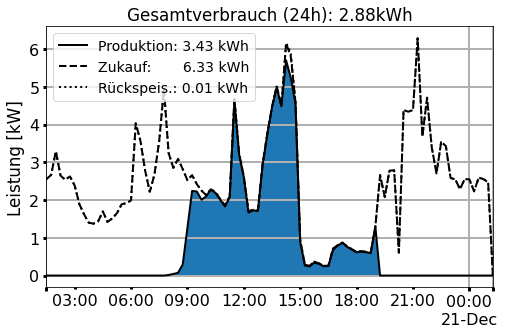

In [19]:
df = data.copy()
#df = summer_data.copy()
df = df[["SelfConsumption","Purchased","FeedIn"]]
df = df / 1000 # set to KWh
df = df.iloc[1: , :]    # Drop first row

# Plot lines
scaling = 100
fontsize = 14
width = EPD_WIDTH / scaling
height = EPD_HEIGHT / scaling
cmap = colors.ListedColormap(["black"])


# Add total consumption
hours = float((data.index.values[-1] - data.index.values[0])) * 10**-9 / 3600
total_selfConsumption = df["SelfConsumption"].sum() / hours
total_purchased = df["Purchased"].sum() / hours
total_feedin = df["FeedIn"].sum() / hours
total = (total_purchased - total_selfConsumption - total_feedin) 


df.plot(
    style=["-", "--", ":"], 
    figsize=(width, height), 
    cmap=cmap, 
    fontsize=fontsize,
    stacked=True
    )

plt.fill_between(df.index, df["SelfConsumption"])

# Formatting
for line in plt.gca().get_lines(): line.set_linewidth(2)  # Line thickness
plt.title(f"Gesamtverbrauch (24h): {total:.2f}kWh", fontsize=fontsize*1.2)
plt.grid(linewidth=2)
plt.xlabel("")
plt.ylabel("Leistung [kW]", fontsize=fontsize*1.2)
plt.legend(
    labels=[
        f"Produktion: {total_selfConsumption:.2f} kWh", 
        f"Zukauf:       {total_purchased:.2f} kWh",
        f"Rückspeis.: {total_feedin:.2f} kWh",], 
    fontsize=fontsize)
plt.gca().xaxis.set_tick_params(which='both', width=3, labelsize=16)
plt.gca().yaxis.set_tick_params(which='both', width=3, labelsize=16)


plt.savefig("../out/plot.png")


plt.show()

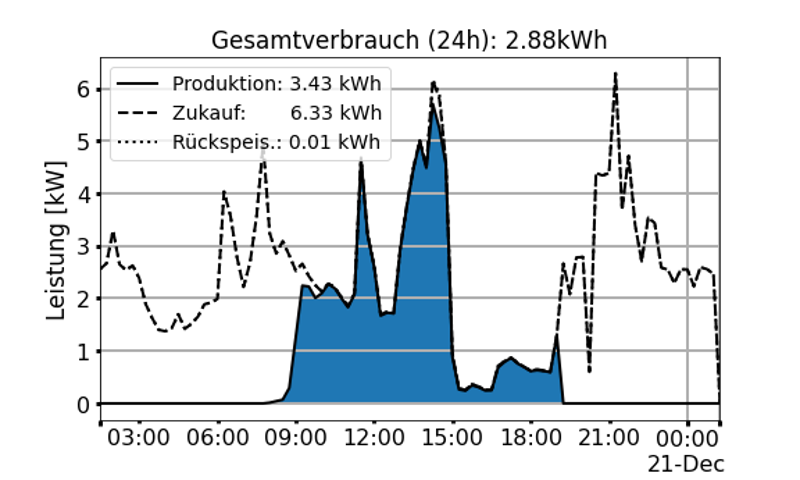

In [20]:
# png to bmp
from PIL import Image

file_in = "../out/plot.png"
img = Image.open(file_in)#.convert("1")

thresh = 20
fn = lambda x : 255 if x > thresh else 0
r = img.convert('L').point(fn, mode='1')


img = img.resize((800,480))
file_out = "../out/plot.bmp"
img.save(file_out)
img


In [ ]:
summer = datetime(year=2021, month=8, day=10, hour=23)
summer_data = se_interface.request_SitePowerDetailed(summer, timedelta(days=2))

generate_plot(summer_data)

In [ ]:
# include parent folder (Notebook version)
import os, sys, inspect

notebook_dir = os.getcwd()
parentdir = os.path.dirname(notebook_dir)

sys.path.insert(0, parentdir)


from lib.epd7in5_V2 import *
from PIL import Image,ImageDraw,ImageFont

epd = EPD()

logging.info("init and Clear")
epd.init()
epd.Clear()

In [ ]:
Himage = Image.open("../out/plot.bmp")
epd.display(epd.getbuffer(Himage))

# Special Images

12